In [1]:
from scipy.io import loadmat, whosmat
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
import os

%matplotlib inline

## Overview of .mat file structure

<img src="./images/NASADataStructure.png"/>

for each element in data...

- element[0] = charge/discharge/impedance
    - if element[0] = charge/discharge
        - element[1] = ambient temperature
        - element[2] = date/time
        - element[3] = data
            - data fields:
                - Voltage_measured
                - Current_measured
                - Temperature_measured
                - Current_charge
                - Voltage_charge
                - Time
    - if element[0] = impedance
        - element[1] = ambient temperature
        - element[2] = date/time
        - element[3] = data
            - data fields:
                - Sense_current
                - Battery_current
                - Current_ratio
                - Battery_impedance
                - Rectified_Impedance
                - Re
                - Rct

## 1. Turn .mat files into python dictionaries and save

### Build dictionaries from data structures

In [2]:
def build_dictionaries(mess):

    discharge, charge, impedance = {}, {}, {}

    for i, element in enumerate(mess):

        step = element[0][0]

        if step == 'discharge':
            discharge[str(i)] = {}
            discharge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            discharge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            discharge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            discharge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            discharge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            discharge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            discharge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            discharge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'charge':
            charge[str(i)] = {}
            charge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            charge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            charge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            charge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            charge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            charge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            charge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            charge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'impedance':
            impedance[str(i)] = {}
            impedance[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            impedance[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            impedance[str(i)]["sense_current"] = {}
            impedance[str(i)]["battery_current"] = {}
            impedance[str(i)]["current_ratio"] = {}
            impedance[str(i)]["battery_impedance"] = {}
            impedance[str(i)]["rectified_impedance"] = {}

            impedance[str(i)]["sense_current"]["real"] = np.real(data[0][0][0][0]).tolist()
            impedance[str(i)]["sense_current"]["imag"] = np.imag(data[0][0][0][0]).tolist()

            impedance[str(i)]["battery_current"]["real"] = np.real(data[0][0][1][0]).tolist()
            impedance[str(i)]["battery_current"]["imag"] = np.imag(data[0][0][1][0]).tolist()

            impedance[str(i)]["current_ratio"]["real"] = np.real(data[0][0][2][0]).tolist()
            impedance[str(i)]["current_ratio"]["imag"] = np.imag(data[0][0][2][0]).tolist()

            impedance[str(i)]["battery_impedance"]["real"] = np.real(data[0][0][3]).tolist()
            impedance[str(i)]["battery_impedance"]["imag"] = np.imag(data[0][0][3]).tolist()

            impedance[str(i)]["rectified_impedance"]["real"] = np.real(data[0][0][4]).tolist()
            impedance[str(i)]["rectified_impedance"]["imag"] = np.imag(data[0][0][4]).tolist()

            impedance[str(i)]["re"] = float(data[0][0][5][0][0])
            impedance[str(i)]["rct"] = float(data[0][0][6][0][0])
            
    return discharge, charge, impedance

### Save as json

In [3]:
def save_json(dictionary, name):
    with open(name + '.json', 'w') as f:
        json.dump(dictionary, f, indent=4)

### Loop through all files

In [10]:
folder = './Data/1. BatteryAgingARC-FY08Q4'
json_folder = './json_data'
filenames = [f for f in os.listdir(folder) if f.endswith('.mat')]

for filename in filenames:
    name = filename.split('.mat')[0]
    print(name)
    struct = loadmat(folder + '/' + filename)
    mess = struct[name][0][0][0][0]
    
    discharge, charge, impedance = build_dictionaries(mess)
    
    # Save JSON files in the 'json_data' folder
    save_json(discharge, os.path.join(json_folder, name + '_discharge'))
    save_json(charge, os.path.join(json_folder, name + '_charge'))
    save_json(impedance, os.path.join(json_folder, name + '_impedance'))   

B0018
B0005
B0006
B0007


## 2. Example of loading and plotting impedance data

### Read .json file in to python

In [11]:
with open('./json_data/B0005_impedance.json') as f:    
    impedance_data = json.load(f)
    
with open('./json_data/B0005_discharge.json') as f:    
    discharge_data = json.load(f)

### Plot 

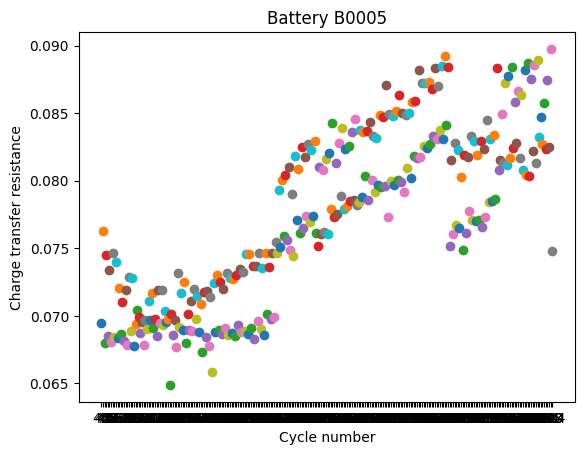

In [12]:
for cycle in impedance_data.keys():
    plt.plot(cycle, impedance_data[cycle]["rct"], 'o')
    plt.ylabel('Charge transfer resistance')
    plt.xlabel('Cycle number')
    plt.title('Battery B0005')
plt.show()

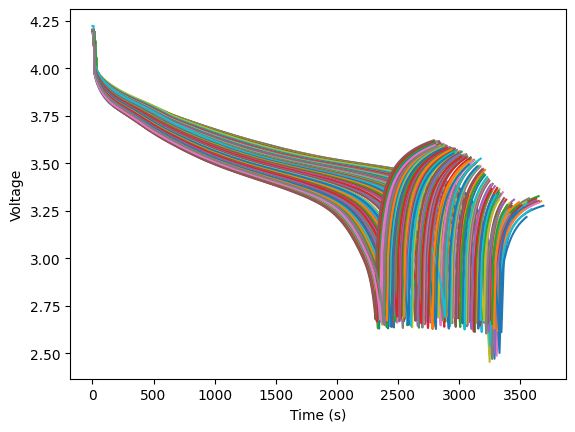

In [13]:
for cycle in discharge_data.keys():
    plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["voltage_battery"], '-')
    plt.ylabel('Voltage')
    plt.xlabel('Time (s)')
plt.show()